# Pyomo model demo:
# Multi-period Diafiltration Experiment
# Lag and overflow

Xinhong Liu xliu27@nd.edu

### Import library

In [1]:
import seaborn as sns
from utility import *

# NF270-Lag

In [2]:
def plot_error_box(fit_struA, fit_struB, regime='concentrating'):
    
    # Set Seaborn style for a clean, professional look
    sns.set_style("whitegrid")
    
    # Update Matplotlib settings for jourl-quality figures
    plt.rcParams.update({
        "font.size": 14,
        "axes.labelsize": 16,
        "axes.titlesize": 16,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "legend.fontsize": 14,
        "lines.linewidth": 2
    })
    
    # Compute normalized residuals
    res1 = np.concatenate([np.array(fit_struA['res_std']['res_m']) / sqrt(len(fit_struA['res_std']['res_m'])), 
                           np.array(fit_struA['res_std']['res_cp']) / sqrt(len(fit_struA['res_std']['res_cp'])), 
                           np.array(fit_struA['res_std']['res_cf']) / sqrt(len(fit_struA['res_std']['res_cf']))])
    res2 = np.concatenate([np.array(fit_struB['res_std']['res_m']) / sqrt(len(fit_struB['res_std']['res_m'])), 
                           np.array(fit_struB['res_std']['res_cp']) / sqrt(len(fit_struB['res_std']['res_cp'])), 
                           np.array(fit_struB['res_std']['res_cf']) / sqrt(len(fit_struB['res_std']['res_cf']))])
    
    # Create DataFrame for Seaborn
    res_dict = pd.DataFrame({
        "Residuals": np.concatenate([res1, res2]),
        "Types": (["Mass"] * len(fit_struA['res_std']['res_m']) 
                  + ["Permeate"] * len(fit_struA['res_std']['res_cp']) 
                  + ["Retentate"] * len(fit_struA['res_std']['res_cf'])) * 2,
        "Solute Transport": (["Diffusion Only"] * len(res1) + ["Convection-Diffusion"] * len(res2))
        })
    
    # Create the horizontal box plot
    plt.figure(figsize=(7, 5))
    
    ax = sns.boxplot(data=res_dict, x='Residuals', y='Types', hue='Solute Transport',
                     palette={"Diffusion Only": "#4C72B0", "Convection-Diffusion": "#DD8452"}, 
                     width=0.7, 
                     boxprops=dict(linewidth=2),
                     whiskerprops=dict(linewidth=2),
                     capprops=dict(linewidth=2),
                     medianprops=dict(linewidth=2, color="black"),
                     flierprops=dict(marker="o", color="red", alpha=0.6),
                     legend=False)
    
    plt.xlim([-1.5, 1.5])
    plt.xlabel("Weighted Errors", fontsize=16)
    plt.ylabel("")
    ax.tick_params(axis="y",direction="in", pad=-5)
    ax.set_yticks([0,1,2])
    ax.set_yticklabels(ax.get_yticklabels(),ha="left")
    
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    
    # Annotate the two categories with labels
    plt.annotate('Diffusion Only', xy=(0.9,0.2),  xycoords='data',
                 weight='bold',
                 size=16, ha='center', va="center", color="white",
                 bbox=dict(boxstyle="round", color = "#4C72B0", alpha=0.75))
    
    plt.annotate("Convection-Diffusion", xy=(0.9,0.5),  xycoords='data',
                 weight='bold',
                 size=16, ha='center', va="center", color="white",
                 bbox=dict(boxstyle="round", color = "#DD8452", alpha=0.75))
    
    # Save figure
    plt.tight_layout()
    plt.savefig(regime + "_residuals_boxplot.png", dpi=600, bbox_inches="tight")
    
    # Show the plot
    plt.show()

## Concentrating Regime

In [3]:
data_stru = loadmat('data_library/data_stru-dataset270511.123.mat')['data_stru']


Loading data file = data_library/data_stru-dataset270511.123.mat 



In [4]:
mode = 'Lag'
fit_stru1, sim_stru1, sim_inter1 = solve_model(data_stru, mode, sim_opt=False, B_form='single')

###################################################################
Creating and solving the Pyomo model with the following settings: 
mode = Lag
theta = None
sim_opt = False
B_form = single
 
Ipopt 3.13.2: linear_solver=ma97
max_iter=3000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales 

In [5]:
mode = 'Lag'
theta = {'Lp': 11,
  'beta_c': 15,
  'beta_0': 1,
  'beta_1': 0.01,
  'sigma': 1.0,
  'S0': 0}
fit_stru2, sim_stru2, sim_inter2 = solve_model(data_stru, mode, theta, sim_opt=False, B_form=1,LOUD=False)

###################################################################
Creating and solving the Pyomo model with the following settings: 
mode = Lag
theta = {'Lp': 11, 'beta_c': 15, 'beta_0': 1, 'beta_1': 0.01, 'sigma': 1.0, 'S0': 0}
sim_opt = False
B_form = 1
 
Ipopt 3.13.2: linear_solver=ma97
max_iter=3000


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    fo

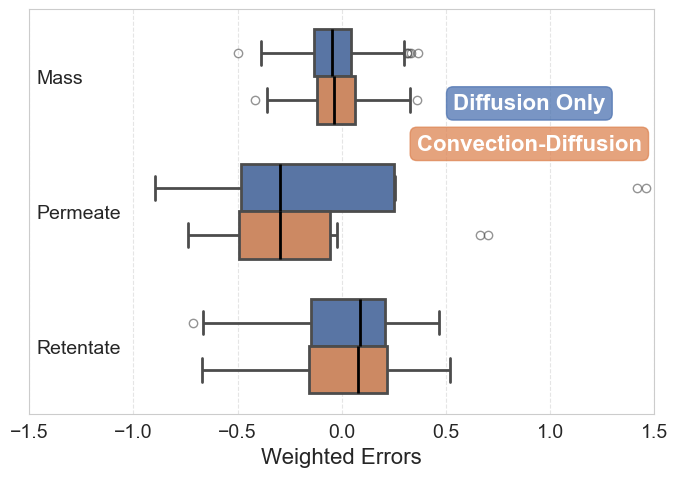

In [6]:
plot_error_box(fit_stru1, fit_stru2, regime='concentrating')

## Diluting Regime

In [7]:
data_stru = loadmat('data_library/data_stru-dataset270511.821.mat')['data_stru']


Loading data file = data_library/data_stru-dataset270511.821.mat 





###################################################################
Creating and solving the Pyomo model with the following settings: 
mode = DATA
theta = {'Lp': 10.106582659197427, 'B': 16.418266360453412, 'sigma': 1.0}
sim_opt = False
B_form = single
sigma_fixed = True
 


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 5.37283e-006 and h = 2.87328e-019, the corrector convergence failed repeatedly or with |h| = 

Ipopt 3.13.2: linear_solver=ma97


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        compu

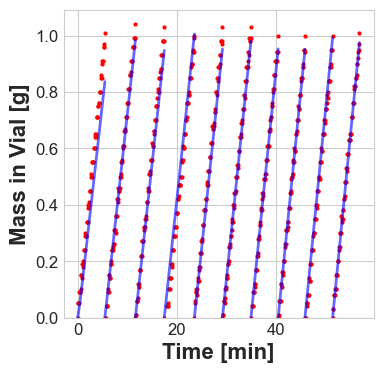

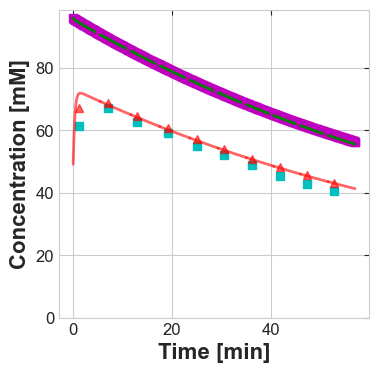

In [8]:
mode = 'DATA'
fit_stru_base = {'parameters': {'Lp': 10.106582659197427, 
            'B': 16.418266360453412, 
            'sigma': 1.0}}
fit_stru3, sim_stru3, sim_inter3 = solve_model_B_fix(data_stru, mode, theta=fit_stru_base['parameters'], sim_opt=False, B_form='single')
plot_sim_comparison(data_stru,sim_stru3,stirc_mass=False,plot_pred=True,lg=False,LOUD=True)



###################################################################
Creating and solving the Pyomo model with the following settings: 
mode = DATA
theta = {'Lp': 10.167220041683919, 'beta_0': 0.994192507828375, 'beta_1': 0.013476905272029719, 'sigma': 1.0}
sim_opt = False
B_form = 1
sigma_fixed = True
 


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
At t = 5.3493e-006 and h = 3.19927e-019, the corrector convergence failed repeatedly or with |h| = h

Ipopt 3.13.2: linear_solver=ma97


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineering Framework (IDAES PSE
    Framework) Copyright (c) 2018-2019. See https://github.com/IDAES/idaes-pse.

This version of Ipopt was compiled using HSL, a collection of Fortran codes
    for large-scale scientific computation.  All technical papers, sales and
    publicity material resulting from use of the HSL codes within IPOPT must
    contain the following acknowledgement:
        HSL, a collection of Fortran codes for large-scale scientific
        compu

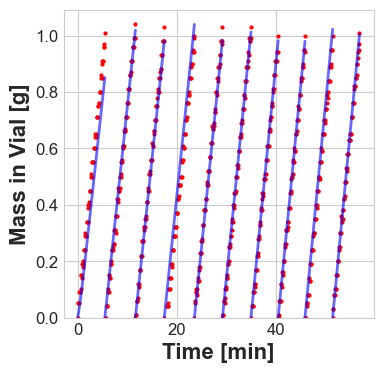

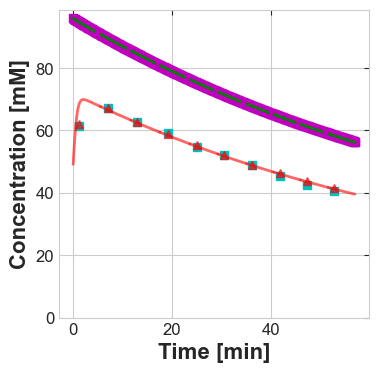

In [9]:
mode = 'DATA'
fit_stru_base = {'parameters': {'Lp': 10.167220041683919, 
            'beta_0': 0.994192507828375, 
            'beta_1': 0.013476905272029719, 
            'sigma': 1.0}}
fit_stru4, sim_stru4, sim_inter4 = solve_model_B_fix(data_stru, mode, theta=fit_stru_base['parameters'], sim_opt=False, B_form=1)
plot_sim_comparison(data_stru,sim_stru4,stirc_mass=False,plot_pred=True,lg=False,LOUD=True)

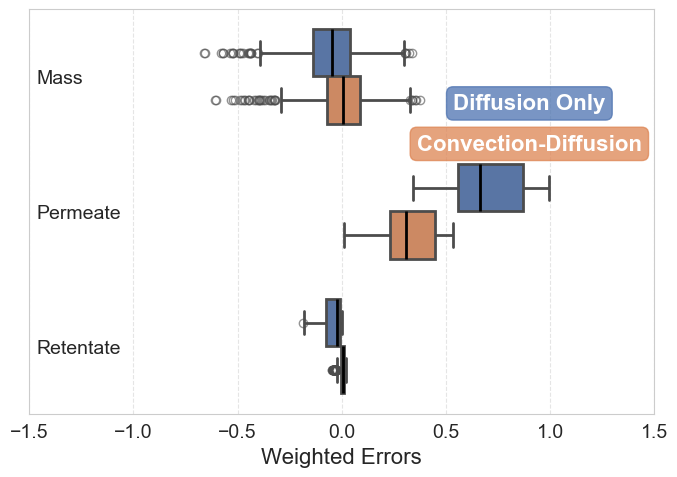

In [10]:
plot_error_box(fit_stru3, fit_stru4, regime='diluting')

# Information from Lag vs. Overflow

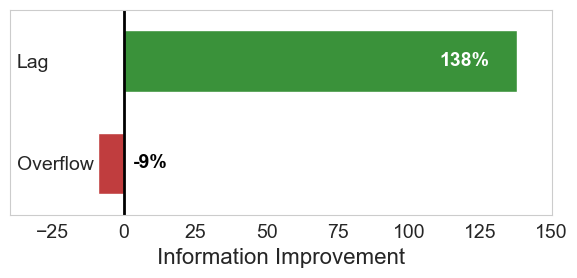

In [11]:
# Set style for clean visualization
sns.set_style("whitegrid")

# Define improvement percentages
modes = ["Lag", "Overflow"]
improvements = [138, -9]  # Improvement percentages

# Define colors: Green for improvement, Red for negative impact
colors = ["#2CA02C" if imp > 0 else "#D62728" for imp in improvements]

# Create DataFrame for visualization
df = pd.DataFrame({"Mode": modes, "Improvement": improvements})

# Create figure
plt.figure(figsize=(6, 3))

# Plot bar chart
ax = sns.barplot(data=df, x="Improvement", y="Mode", hue="Mode", palette=colors, width=0.6, legend=False)

# Add text annotations inside the bars
for i, (imp, mode) in enumerate(zip(improvements, modes)):
    text_color = "white" if imp > 0 else "black"  # Ensure text is readable
    plt.text(imp - (10 if imp > 0 else -12), i, f"{imp}%", ha="right" if imp > 0 else "left", 
             va="center", fontsize=14, fontweight="bold", color=text_color)

# Set x-axis limits for clarity
plt.xlim([-40, 150])
ax.grid(False)
ax.axvline(x=0, color='k')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis="y",direction="in", pad=-5)
ax.set_yticks([0,1])
ax.set_yticklabels(ax.get_yticklabels(),ha="left")

# Remove y-axis label for minimalism
plt.ylabel("")

# Set x-axis label
plt.xlabel("Information Improvement")

# Save figure at high resolution (600 dpi)
plt.tight_layout()
plt.savefig("startup_barplot.png", dpi=600, bbox_inches="tight")

# Show the plot
plt.show()
